# Tutorial on the DataSet object

## Example of how to use the COLIBRI Dataset

In [1]:
from colibri import DataSet

In [2]:
modules = [
    "AcvExploitationOnly",
    "CircularEconomyIndicator",
    "LimitedGenerator",
    "OccupantModel",
    "LayerWallLosses",
    "ThermalSpaceSimplified",
    "WeatherModel",
]

In [3]:
datamodel = DataSet(modules=modules)

### Documentation and information to understand COLIBRI DataSet

In [4]:
# Use 'describe' to get all the objects available in the COLIBRI Dataset and a short explanation of each object/archetype
# The associated documentation is automatically generated from existing schemes in COLIBRI code.
# You can therefore see the available objects, archetypes, and nodes.
datamodel.describe()

[2024-09-26 08:19:31 - /mnt/d/developments/versioned/colibri/colibri/src/colibri/datamodel/dataset.py (L529) - INFO] COLIBRI dataset is composed of archetypes, modules, or project objects (structure, boundary or element objects).
COLIBRI structure objects are:

boundary: A boundary is a two-sided plane surface delimiting spaces and/or the exterior.
A boundary can be fictive or concrete (wall, floor, roof...).

boundary_condition: A boundary condition is used to impose boundary conditions (to a boundary, to a real network...).

building: Building.

linear_junction: A linear junction is used when boundaries are in contact on a segment and can be used for thermal bridges calculation or for the 3D structure of a project.

punctual_junction: A punctual junction is used when objects are linked through an assimilated 'single point connexion'.
Example: a pipe with an air vent.

project: Project.

segment: A segment describe the edge of a boundary, which is useful for representing the boundary 

In [5]:
# To "zoom" on a specific object documentation
datamodel.describe(type_name="Layer")

{'lca_impact_properties': {'description': 'Life cycle analysis (LCA) impact properties (matrix) of the layer.Rows are representing EN15804 impacts and columns LCA phase impacts.', 'format': 'ndarray', 'min': None, 'max': None, 'unit': 'kgCO2', 'choices': None, 'default': None, 'required': None}, 'installation_year': {'description': 'Installation year of the layer.', 'format': 'int', 'min': 0, 'max': 100, 'unit': 'year', 'choices': None, 'default': 1, 'required': None}, 'service_life': {'description': 'Reference life of the layer.', 'format': 'int', 'min': 0, 'max': 100, 'unit': 'year', 'choices': None, 'default': 50, 'required': None}, 'constitutive_materials': {'description': "Collection of materials composing the layer, described by a list of dictionnaries having 'share' (ratio) and 'constitutive_material_type' (enum).The sum of the share of each element of the collection as to be equal to 1.", 'format': 'List[Dict[str, Any]]', 'min': None, 'max': None, 'unit': '-', 'choices': None, 

In [6]:
datamodel.describe(type_name="Space")

[2024-09-25 15:52:45 - /mnt/d/developments/sandbox/colibri/src/colibri/datamodel/dataset.py (L529) - INFO] List of parameters for the Space (StructureObject) object:
- id: Unique identifier (ID) of the space. [-]
- label: Name/label of the space (room), not used as id. [-]
- boundaries: Boundaries related to the space. [-]
- q_needs: Needs of the space. [W]
- occupant_per_square_meter: Number of occupants per square meter. [-]
- inside_air_temperatures: Inside air temperature of the spaces. [°C]
- setpoint_temperatures: Setpoint air temperature for each space. [°C]
- gains: Occupation gains for each space. [W]
- previous_inside_air_temperatures: Inside air temperature of the spaces at the previous time step. [°C]
- thermal_capacity: Thermal capacity. [J/(m³.°C)]
- height: Height of the space. [m]



In [7]:
datamodel.describe(type_name="Layer", parameter_name="thermal_conductivity")

[2024-09-25 15:52:47 - /mnt/d/developments/sandbox/colibri/src/colibri/datamodel/dataset.py (L529) - INFO] thermal_conductivity:
Thermal conductivity of the layer.
- max: 5
- default: 1.75
- min: 0.01
- format: float
- unit: W/(m.K)



In [8]:
# If you want to know more about how to use describe and its possibilities
datamodel.describe?

Signature:
datamodel.describe(
    category: Optional[str] = None,
    type_name: Optional[str] = None,
    parameter_name: Optional[str] = None,
) -> None
Docstring:
Provide/print help/documentation about dataset objects' parameters

Parameters
----------
category : Optional[str]
    Category of the object (in which scheme to search for).
    If not set, use the first one. Possible values are:
        - "Archetypes"
        - "BoundaryObject"
        - "ElementObject"
        - "StructureObject"
        - "Modules"
type_name : Optional[str]
    Name of the type of object (among a given category)
parameter_name : Optional[str]
    Name of the parameter of a given object (category and type_name)

Returns
-------
None

Raises
------
None

Examples
--------
>>> None
File:      /mnt/d/developments/sandbox/colibri/src/colibri/datamodel/dataset.py
Type:      method

In [9]:
# If you want to know more about any existing DataSet available functions
datamodel.doc()

AttributeError: 'DataSet' object has no attribute 'doc'

### Edit/Add elements to the dataset

For example, you can create an archetype element: ``datamodel.add_archetype("<ARCHETYPE_NAME>W")``

*An archetype is a factorization of the properties of an object (component library). For instance: A window with its intrinsic characteristics is an archetype which can be called/referenced by window objects placed multiple times in the building. Integration properties are stored in objects. Intrinsic characteristics are stored in archetypes.*

In [11]:
datamodel.add_archetype("Layer")


Set your own archetype_id (must be a unique string) or type 'no' to generate one randomly:  no

Missing archetype label. Set your own archetype label (string).
Labels are not used for computation, but could be displayed in graphical user interfaces.
Type 'no' to use the id as a label:  no

Give a value for thickness (type 'default' to use a default value for thickness or 'default to all' for all parameters):


 0.3

Give a value for thermal_conductivity (type 'default' to use a default value for thermal_conductivity or 'default to all' for all parameters):


 default to all


'Layer_d84e99cc-55c1-4c34-80ac-d23e1f79f6dc'

In [12]:
datamodel.archetype_collection["Layer_types"]["Layer_d84e99cc-55c1-4c34-80ac-d23e1f79f6dc"]

{'thickness': '0.3',
 'thermal_conductivity': 1.75,
 'specific_heat': 900,
 'density': 2500,
 'material_type': 'concrete'}

In [13]:
# You can also set parameter values directly in the function - just use the parameter name as in the documentation: here datamodel.describe("Layer"). 
# Only missing parameters will be asked through the prompt.
datamodel.add_archetype(
    type_name="Layer",
    archetype_id="isolant-1",
    label="isolant 15cm pour mur verticaux",
    thickness=0.15,
    thermal_conductivity=0.035,
    specific_heat=1030,
    density=25,
    material_type="insulation",
    constitutive_material_type="rock wood",
)

'isolant-1'

In [14]:
datamodel.archetype_collection["Layer_types"]["isolant-1"]

{'thickness': 0.15,
 'thermal_conductivity': 0.035,
 'specific_heat': 1030,
 'density': 25,
 'material_type': 'insulation'}

## Creating a whole new COLIBRI Dataset

In [10]:
from unittest.mock import patch
from IPython.display import Image, display

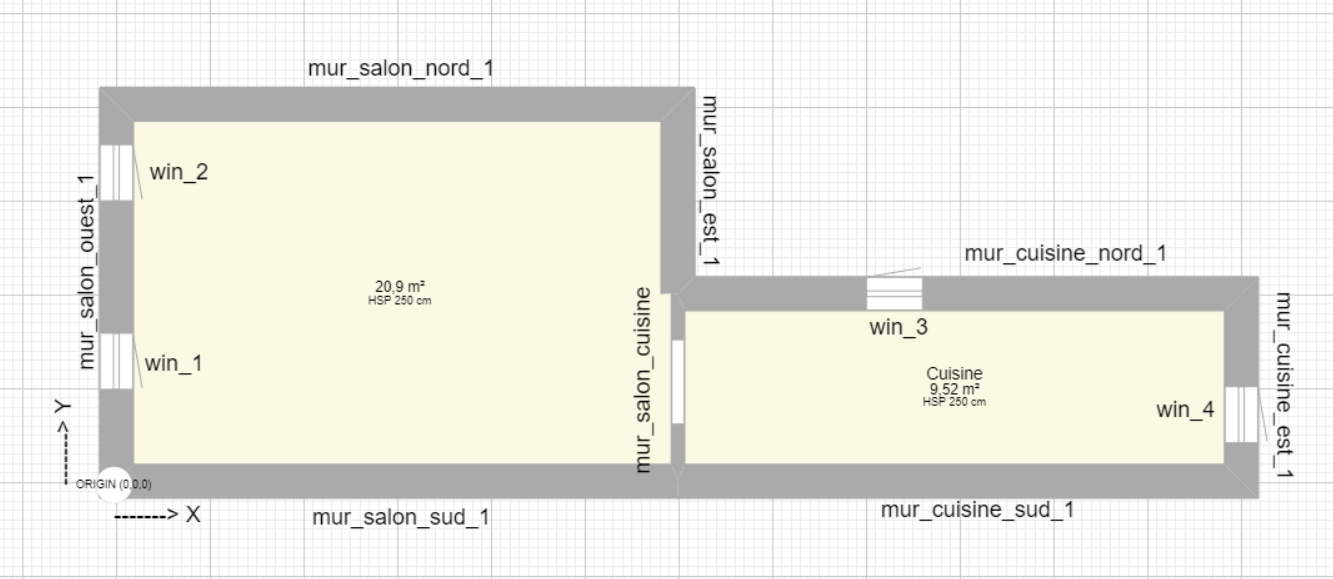

In [11]:
display(Image(filename=f"../images/house_1.png"))

In [5]:
modules = [
    "AcvExploitationOnly",
    "LimitedGenerator",
    "OccupantModel",
    "LayerWallLosses",
    "ThermalSpaceSimplified",
    "WeatherModel",
]

In [6]:
house_1 = DataSet(modules=modules)

### Create Archetypes (Component Libraries)

#### Layers

In [14]:
# Default values are used for all parameters that are not set directly
with patch(
    "builtins.input", return_value="default to all"
):  
    # Default thermal properties are already set to concrete values
    house_1.add_archetype(
        "Layer", 
        archetype_id="beton_1", 
        label="béton 20cm", 
        thickness=0.2,
    )  
    house_1.add_archetype(
        "Layer",
        archetype_id="isolant_1",
        label="isolant 15cm pour mur verticaux",
        thickness=0.15,
        thermal_conductivity=0.035,
        specific_heat=1030,
        density=25,
        material_type="insulation",
        constitutive_material_type="rock wood",
    )
    house_1.add_archetype(
        "Layer",
        archetype_id="isolant_toiture",
        label="isolant 10cm pour toiture",
        thickness=0.1,
        thermal_conductivity=0.035,
        specific_heat=1030,
        density=25,
        material_type="insulation",
        constitutive_material_type="rock wood",
    )
    house_1.add_archetype(
        "Layer",
        archetype_id="isolant_plancher",
        label="isolant 5cm pour plancher",
        thickness=0.05,
        thermal_conductivity=0.035,
        specific_heat=1030,
        density=25,
        material_type="insulation",
        constitutive_material_type="rock wood",
    )
    house_1.add_archetype(
        "Layer",
        archetype_id="vide_10",
        label="vide 10cm",
        thickness=0.1,
        thermal_conductivity=0.025,
        specific_heat=1000,
        density=1.293,
        material_type="insulation",
        constitutive_material_type="air",
    )
    house_1.add_archetype(
        "Layer",
        archetype_id="ba_13",
        label="BA13",
        thickness=0.013,
        thermal_conductivity=0.25,
        specific_heat=1000,
        density=850,
        material_type="plaster",
        constitutive_material_type="plaster",
    )

In [15]:
house_1.archetype_collection.keys()

dict_keys(['Layer_types'])

In [16]:
house_1.archetype_collection["Layer_types"].keys()

dict_keys(['beton_1', 'isolant_1', 'isolant_toiture', 'isolant_plancher', 'vide_10', 'ba_13'])

In [17]:
house_1.archetype_collection["Layer_types"]["isolant_toiture"]

{'lca_impact_properties': None,
 'installation_year': 1,
 'service_life': 50,
 'constitutive_materials': [{'share': 1, 'material_type': 'concrete'}],
 'end_of_life_properties': None,
 'thickness': 0.1,
 'thermal_conductivity': 0.035,
 'specific_heat': 1030,
 'density': 25,
 'material_type': 'insulation',
 'emissivity': 0.92,
 'light_reflectance': 0.8,
 'albedo': 0.25}

## Load an existing COLIBRI Dataset

In [ ]:
import json

In [ ]:
# Load an existing dataset
json_path = 
with open("house_1.json", "r") as _file_descriptor:
    data = json.load(_file_descriptor)
existing_house_1 = DataSet(data)

In [7]:
house_1.add_archetype(type_name="Layer", archetype_id="toto")


Missing archetype label. Set your own archetype label (string).
Labels are not used for computation, but could be displayed in graphical user interfaces.
Type 'no' to use the id as a label:  no

Give a value for lca_impact_properties (type 'default' to use a default value for lca_impact_properties or 'default to all' for all parameters):


 None

Give a value for installation_year (type 'default' to use a default value for installation_year or 'default to all' for all parameters):


 1

Give a value for service_life (type 'default' to use a default value for service_life or 'default to all' for all parameters):


 55

Give a value for constitutive_materials (type 'default' to use a default value for constitutive_materials or 'default to all' for all parameters):


 None

Give a value for end_of_life_properties (type 'default' to use a default value for end_of_life_properties or 'default to all' for all parameters):


 None

Give a value for thickness (type 'default' to use a default v

'toto'

In [8]:
house_1.archetype_collection

{'Layer_types': {'toto': {'lca_impact_properties': 'None',
   'installation_year': '1',
   'service_life': '55',
   'constitutive_materials': 'None',
   'end_of_life_properties': 'None',
   'thickness': '0.1',
   'thermal_conductivity': '0.5',
   'specific_heat': '200',
   'density': '1234',
   'material_type': 'concrete',
   'emissivity': '0.65',
   'light_reflectance': '0.2',
   'albedo': '0.3'}}}